# Submitted by
# Yogesh Kakde


In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
train_data = pd.read_csv('D:\\EDUCATION AND STUDIES\\YOGESH\\Internship GRIP Spark Foundation\\Task 3\\SampleSuperstore.csv')

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [9]:
train_data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [10]:
train_data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [11]:
print(train_data.shape)

(9994, 13)


In [12]:
train_data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

# From the above code we can understand that We have:

# catagorical Features:
Ship Mode	
Segment	
Country	
City	
State	
Postal Code	
Region	
Category	
Sub-Category	

# Quantitative (Continous valued) Features
Sales	
Quantity	
Discount	
Profit


We will try explore the effect of each feature with respect to profit and sales
So that we can conclude that how any feature is significant for maximizing or minimizing the profit.
Before that we will analyze each feature 

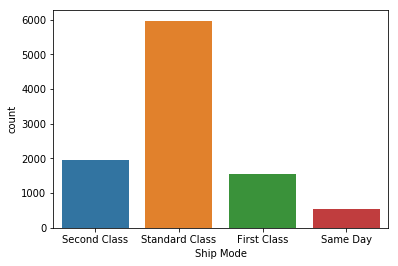

In [13]:
#Checking data distributions of "Ship Mode "

sns.countplot(x='Ship Mode', data = train_data)

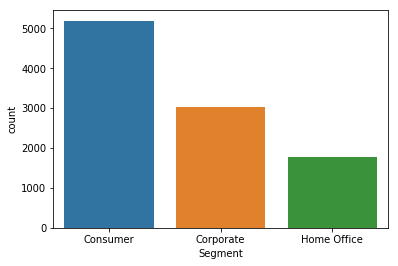

In [14]:
#Checking data distributions of "Segment "

sns.countplot(x='Segment', data = train_data)

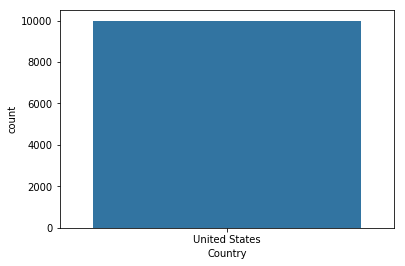

In [15]:
sns.countplot(x='Country', data = train_data)


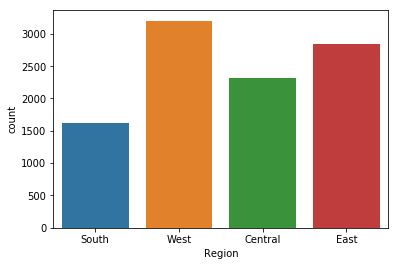

In [16]:
sns.countplot(x='Region', data = train_data)


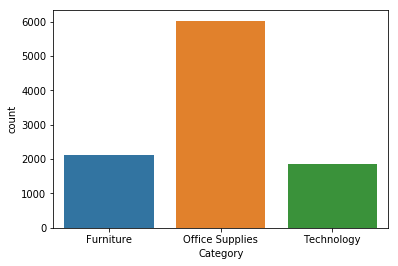

In [17]:

sns.countplot(x='Category', data = train_data)


In [19]:
#Correlation Between Variables.
train_data.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


We can see that there is highest 0.479064 coorelation between profit and sales.

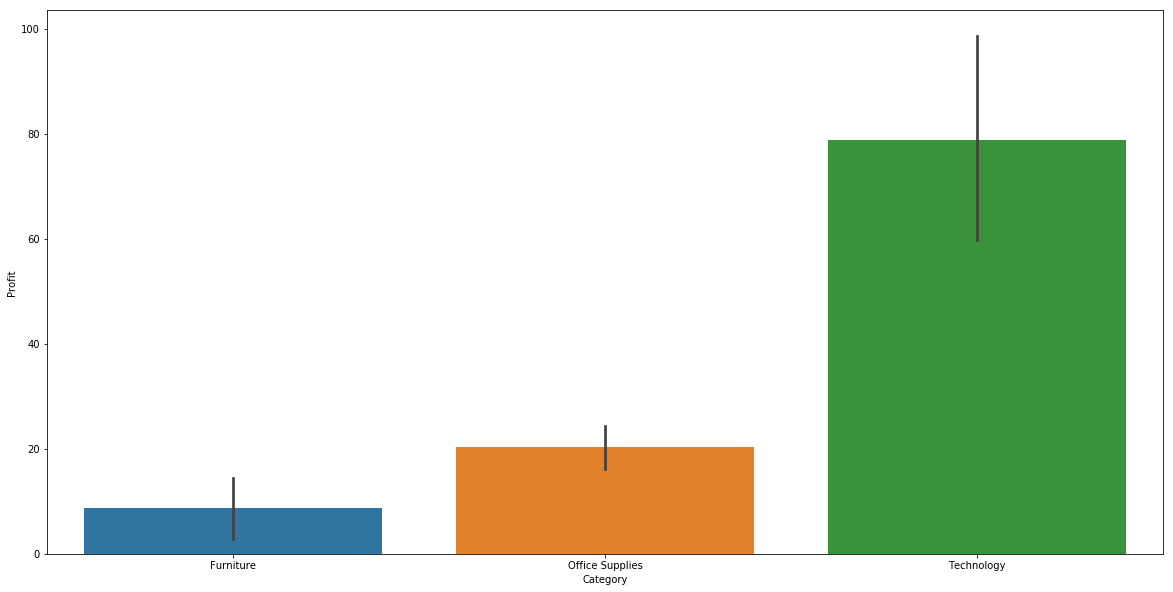

In [20]:
plt.figure(figsize=(20,10))
sns.barplot(x=train_data['Category'], y=train_data['Profit'])

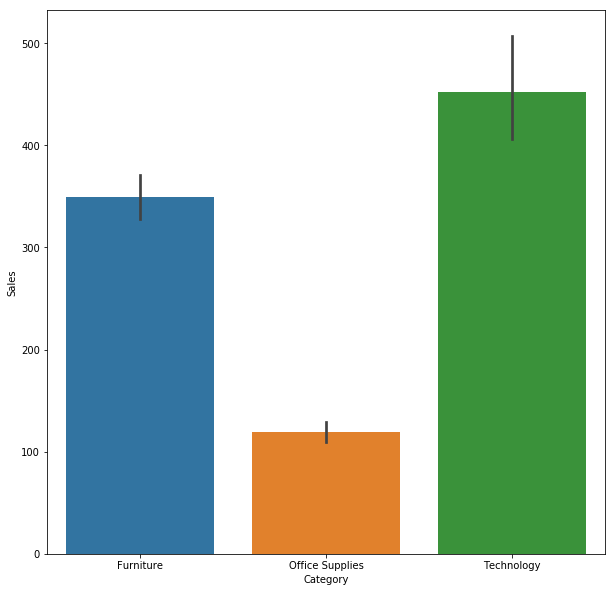

In [21]:
plt.figure(figsize=(10,10))
sns.barplot(x=train_data['Category'], y=train_data['Sales'])

# Conclusion 1: 
    furniture:
here in both of above barplot we can see that there is good/high sales in furniture category but profit is not in that ratio. We would suggest sales manager must look that why even after high sale there is not enough profit. stretagy makers must set more margins and decide suitable discount in case of furniture.

    Office Supplies:
sale to profit ratio is good but sales must increase so that profit can also be more.

    Technology:
Sales and profit both is high and good in ratio.

These observation can also be seen in next barplot


In [27]:
train_data["Profit_to_Sales"] = (train_data["Profit"]/train_data["Sales"])*100
print(train_data["Profit_to_Sales"].head())

0    16.00
1    30.00
2    47.00
3   -40.00
4    11.25
Name: Profit_to_Sales, dtype: float64


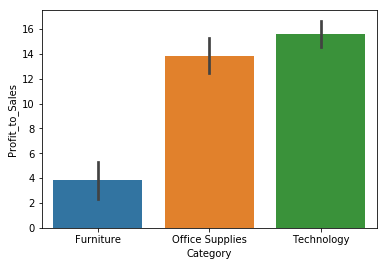

In [23]:
sns.barplot(x='Category', y='Profit_to_Sales', data=train_data)

# statewise analysis

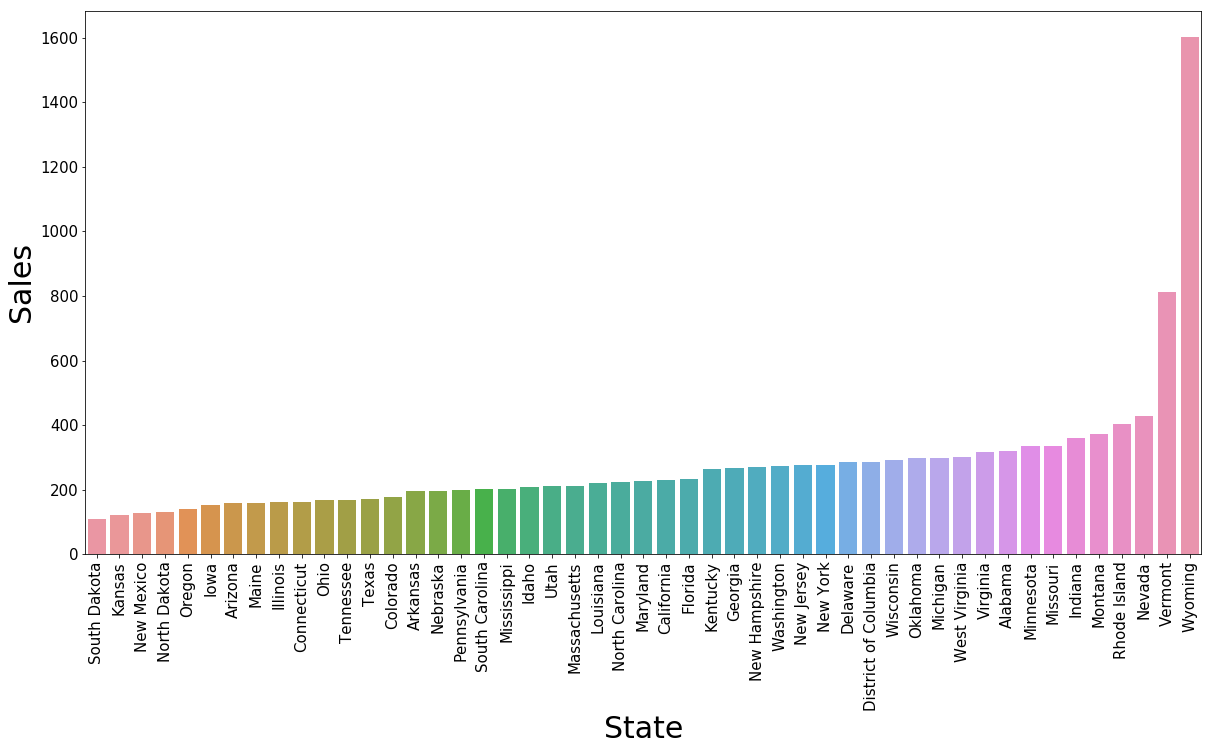

In [24]:
plt.figure(figsize=(20,10))
states = train_data.groupby(['State'])['Sales'].mean().reset_index()
states.sort_values(by=['Sales'], inplace=True)
ed=sns.barplot(x = 'State', y='Sales', data=states)
ed.set_xticklabels(ed.get_xticklabels(),rotation=90)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('State', fontsize=30) 
plt.ylabel('Sales', fontsize=30)
plt.show()


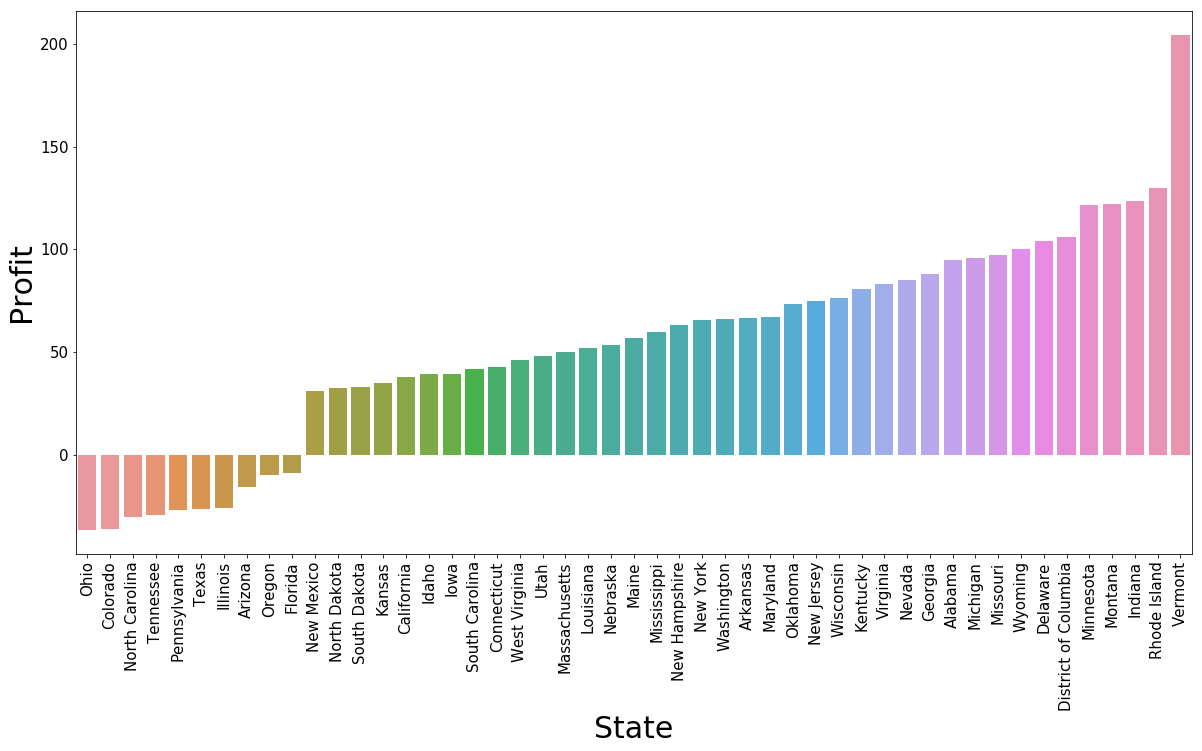

In [25]:
plt.figure(figsize=(20,10))
states = train_data.groupby(['State'])['Profit'].mean().reset_index()
states.sort_values(by=['Profit'], inplace=True)
ed=sns.barplot(x = 'State', y='Profit', data=states)
ed.set_xticklabels(ed.get_xticklabels(),rotation=90)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('State', fontsize=30) 
plt.ylabel('Profit', fontsize=30)
plt.show()

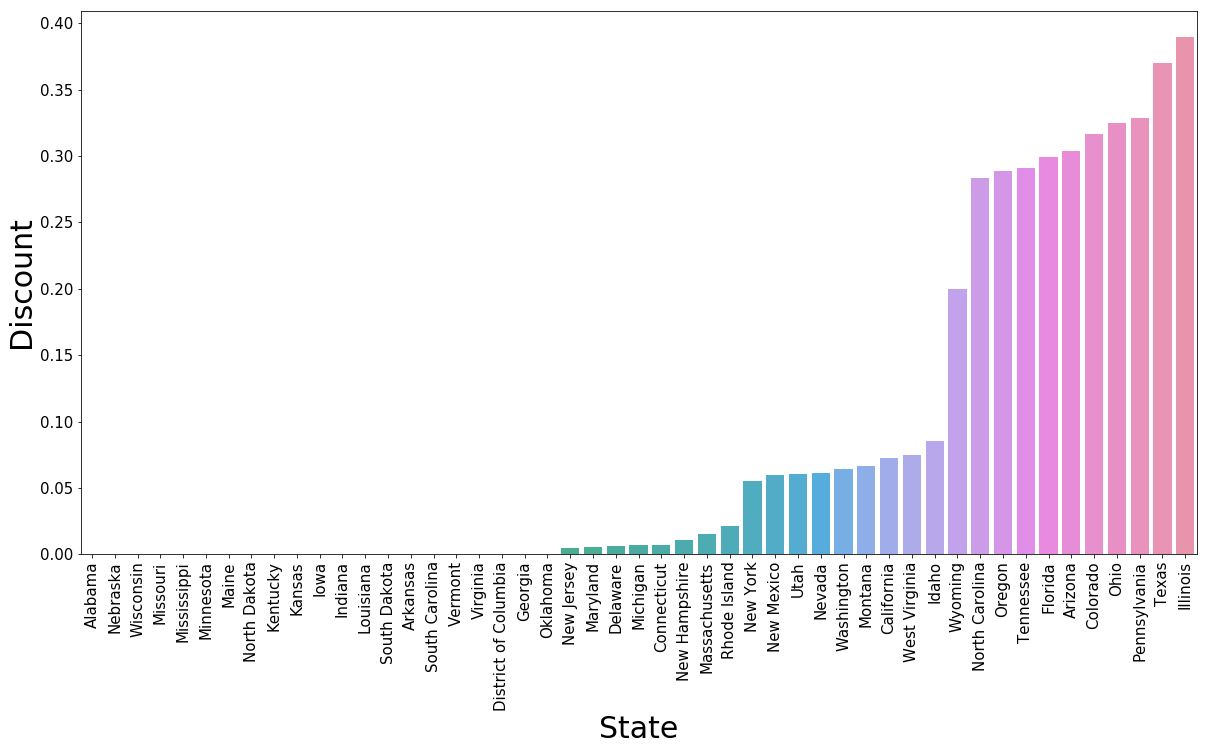

In [26]:
plt.figure(figsize=(20,10))
states = train_data.groupby(['State'])['Discount'].mean().reset_index()
states.sort_values(by=['Discount'], inplace=True)
ed=sns.barplot(x = 'State', y='Discount', data=states)
ed.set_xticklabels(ed.get_xticklabels(),rotation=90)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('State', fontsize=30) 
plt.ylabel('Discount', fontsize=30)
plt.show()

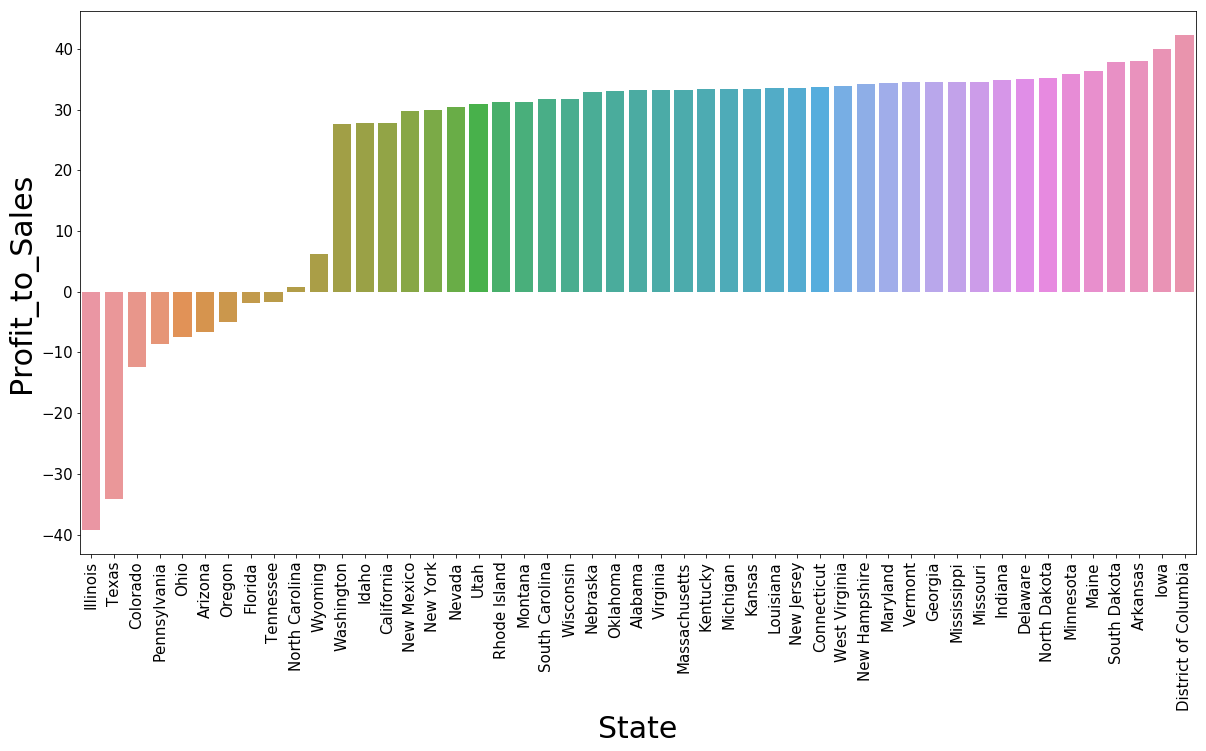

In [28]:
plt.figure(figsize=(20,10))
states = train_data.groupby(['State'])['Profit_to_Sales'].mean().reset_index()
states.sort_values(by=['Profit_to_Sales'], inplace=True)
ed=sns.barplot(x = 'State', y='Profit_to_Sales', data=states)
ed.set_xticklabels(ed.get_xticklabels(),rotation=90)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('State', fontsize=30) 
plt.ylabel('Profit_to_Sales', fontsize=30)
plt.show()

# Conclusion 2:


1. Even after highest sales in the state Wyoming and a moderate discount, profit is not of that scale.
2. States Ohio and Colorado is having lowest profit while sales is moderate. and there is negative Profit_to_Sales ratio. If we talk about discount provided on products in these two states then it is very high. We suggest stretagy maker must look probably they are giving very high discount.
3. State Illinois having highest NEGATIVE profit to sales ratio and stores in this states are providing highest discounts as compared to other states. We suggest the discounts must be immediately stopped or minimised.
4. State South Dakota is lowest in sales but if we see profit to sales ratio then it fourth highest among all states. We suggest the sales must be increased in this state as the state is performing well.


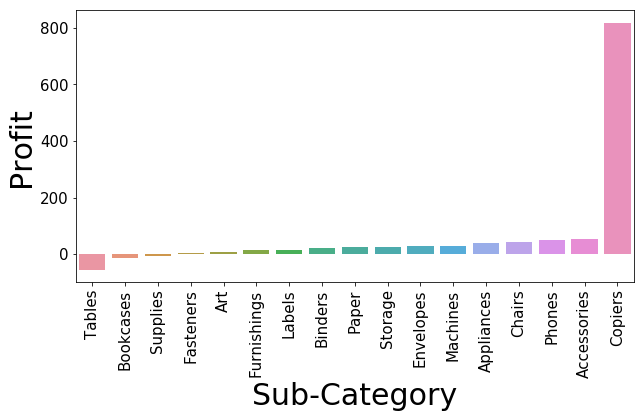

In [29]:
plt.figure(figsize=(10,5))
states = train_data.groupby(['Sub-Category'])['Profit'].mean().reset_index()
states.sort_values(by=['Profit'], inplace=True)
ed=sns.barplot(x = 'Sub-Category', y='Profit', data=states)
ed.set_xticklabels(ed.get_xticklabels(),rotation=90)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Sub-Category', fontsize=30) 
plt.ylabel('Profit', fontsize=30)
plt.show()

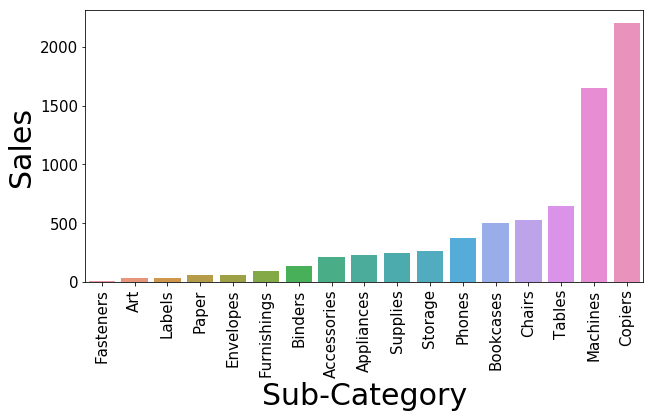

In [40]:
plt.figure(figsize=(10,5))
states = train_data.groupby(['Sub-Category'])['Sales'].mean().reset_index()
states.sort_values(by=['Sales'], inplace=True)
ed=sns.barplot(x = 'Sub-Category', y='Sales', data=states)
ed.set_xticklabels(ed.get_xticklabels(),rotation=90)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Sub-Category', fontsize=30) 
plt.ylabel('Sales', fontsize=30)
plt.show()

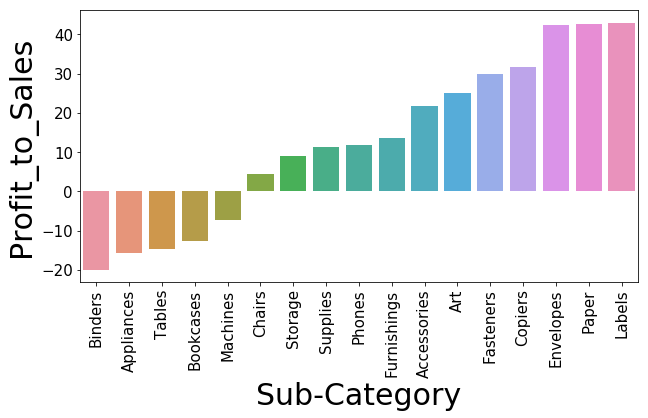

In [30]:
plt.figure(figsize=(10,5))
states = train_data.groupby(['Sub-Category'])['Profit_to_Sales'].mean().reset_index()
states.sort_values(by=['Profit_to_Sales'], inplace=True)
ed=sns.barplot(x = 'Sub-Category', y='Profit_to_Sales', data=states)
ed.set_xticklabels(ed.get_xticklabels(),rotation=90)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Sub-Category', fontsize=30) 
plt.ylabel('Profit_to_Sales', fontsize=30)
plt.show()

# Conclusion 3

1. Sub-category Copier is having highest profit and hghest sales
2. Machines are having highest sales but profit is very low. Profit to sales ratio is NEGATIVE in case of machines. It is suggested to change the stretagy of salling machine in many aspects.
3. Labels, envolpes and papers are performing best. It is suggested to increases sales of these products.
4. Blinders is performing worst in HIGHEST NEGATIVE profit to sales ratio. 

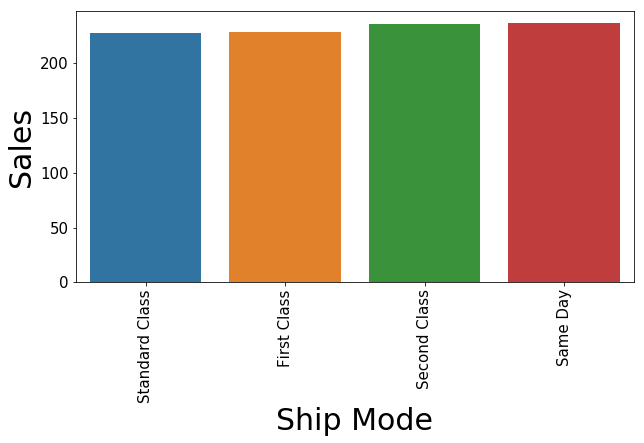

In [41]:
plt.figure(figsize=(10,5))
states = train_data.groupby(['Ship Mode'])['Sales'].mean().reset_index()
states.sort_values(by=['Sales'], inplace=True)
ed=sns.barplot(x = 'Ship Mode', y='Sales', data=states)
ed.set_xticklabels(ed.get_xticklabels(),rotation=90)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Ship Mode', fontsize=30) 
plt.ylabel('Sales', fontsize=30)
plt.show()

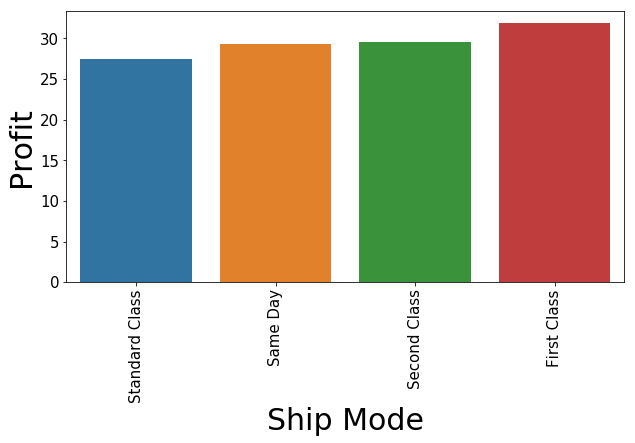

In [38]:
plt.figure(figsize=(10,5))
states = train_data.groupby(['Ship Mode'])['Profit'].mean().reset_index()
states.sort_values(by=['Profit'], inplace=True)
ed=sns.barplot(x = 'Ship Mode', y='Profit', data=states)
ed.set_xticklabels(ed.get_xticklabels(),rotation=90)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Ship Mode', fontsize=30) 
plt.ylabel('Profit', fontsize=30)
plt.show()

# Conclusion 4:

Ship Mode is not enough significant in case of increase or decrease of profit and sales.